# Uncovering Insights and Modeling Employee Well-Being to Mitigate Burnout


## Problem Statement

In today’s fast-paced work environment, organizations are increasingly turning to data-driven strategies to tackle challenges related to employee well-being and productivity. Issues like mental fatigue, how resources are allocated, and the burn rate of employees play a crucial role in shaping workforce efficiency and retention rates. Unfortunately, many organizations struggle to find actionable insights that connect these factors to tangible outcomes.

* Project Goals

This project seeks to explore and model the relationships between several key employee factors:

    - Date of Joining - How does tenure affect burnout levels?

    - Gender - Are there specific trends in fatigue and resource allocation based on gender?

    - Company Type - How do different company cultures and resource distributions vary across types of organizations?

    - WFH Setup Availability - What impact do remote work options have on reducing fatigue?

    - Designation - How does an employee's position influence their workload and stress levels?

    - Resource Allocation - What is the connection between resource distribution and mental fatigue or burnout?

    - Mental Fatigue Score - This serves as a vital indicator of overall employee well-being.

    - Burn Rate - This metric measures productivity and how resources are utilized.

* Methodology

By utilizing the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, we aim to uncover valuable patterns and insights that will help us achieve the following objectives:

1. Understand the underlying factors that contribute to mental fatigue and burn rates.
2. Identify opportunities for optimizing resource allocation to enhance employee performance.
3. Develop a predictive model that can help mitigate burnout risks.

## Data Understanding

In [ ]:
import pandas as pd

# Load the uploaded Excel file
file_path = '/content/cleaned_employee_data.xlsx'
data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
data.sheet_names


['Sheet1']

In [ ]:
# Load the data from "Sheet1"
df = data.parse('Sheet1')

# Display the first few rows to understand the dataset's structure
df.head(2)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2,5.0,0.36


In [ ]:
# Dataset overview
print("Shape of the data:", df.shape)
print("Column Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Shape of the data: (22750, 9)
Column Names: ['Employee ID', 'Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

Data Types:
 Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation              int64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object


### Data Integrity

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)



Number of duplicate rows: 0


In [ ]:
# Detecting out-of-range values in "Burn Rate " (valid range: 0-1)
Burn_rate_scores = df[(df['Burn Rate'] < 0) | (df['Burn Rate'] > 10)]
print("\nInvalid Mental Fatigue Scores:\n", Burn_rate_scores)



Invalid Mental Fatigue Scores:
 Empty DataFrame
Columns: [Employee ID, Date of Joining, Gender, Company Type, WFH Setup Available, Designation, Resource Allocation, Mental Fatigue Score, Burn Rate]
Index: []


### Variable Exploration

In [ ]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
print("\nGender Distribution:\n", gender_counts)


Gender Distribution:
 Gender
Female    11908
Male      10842
Name: count, dtype: int64


In [ ]:
# Company Type distribution
Company_Type = df["Company Type"].value_counts()
print("\nCompany Type Distribution:\n", Company_Type)


Company Type Distribution:
 Company Type
Service    14833
Product     7917
Name: count, dtype: int64


## Data Cleaning

In [ ]:
# Calculate tenure (years since joining)
df['Tenure (Years)'] = (pd.Timestamp.now() - df['Date of Joining']).dt.days / 365
print("\nSample Tenure:\n", df[['Date of Joining', 'Tenure (Years)']].head(2))



Sample Tenure:
   Date of Joining  Tenure (Years)
0      2008-09-30       16.315068
1      2008-11-30       16.147945


In [ ]:
# Label Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Company_type_encoded'] = label_encoder.fit_transform(df['Company Type'])
df['Company_type_encoded'] = label_encoder.fit_transform(df['Company Type'])
df['WFH Setup Available_encoded'] = label_encoder.fit_transform(df['WFH Setup Available'])

# Dropping encoded columns
df = df.drop(['Company Type', 'Gender', 'WFH Setup Available', 'Employee ID', 'Date of Joining'], axis=1)

df.head(1)

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure (Years),Gender_encoded,Company_type_encoded,WFH Setup Available_encoded
0,2,3,3.8,0.16,16.315068,0,1,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1PcCHldwBlTzcE-DFlxEUaGBMek0LErEeWi5dr5o2SCw#gid=0


## Exploratory Data Analysis

### Univariate Analysis

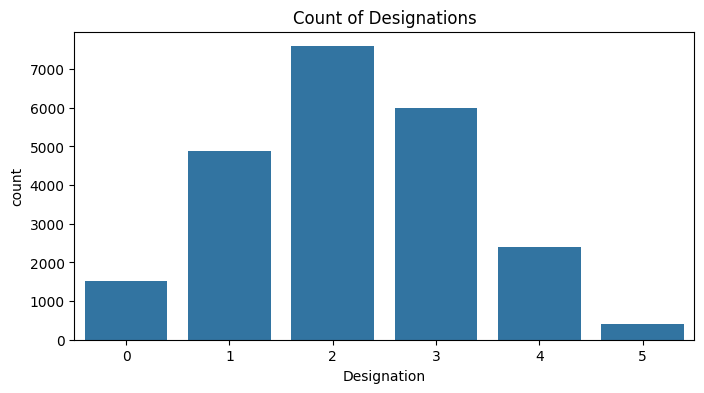

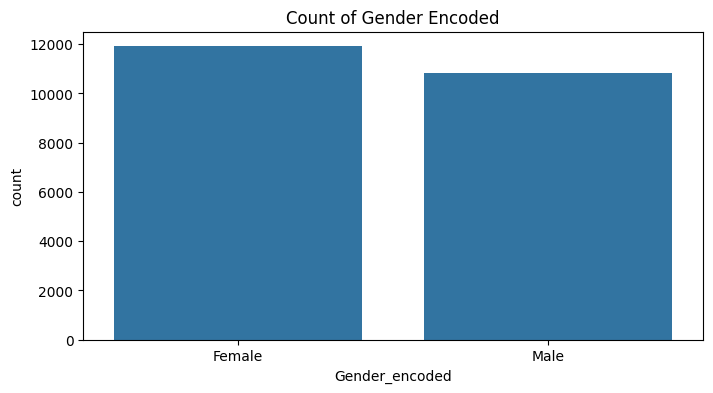

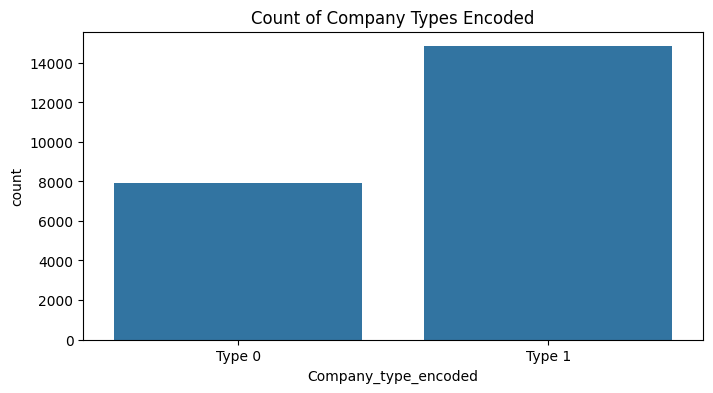

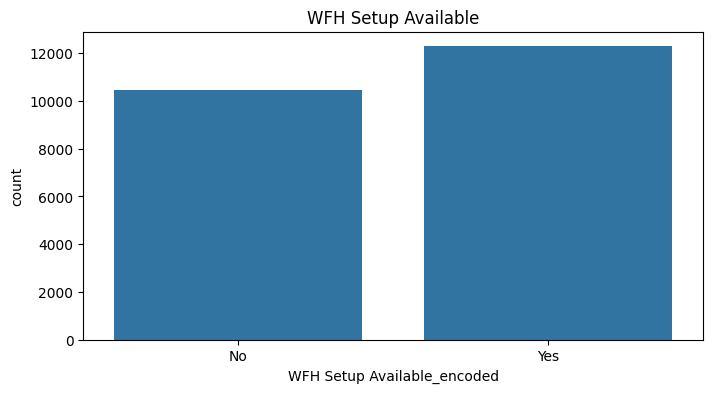

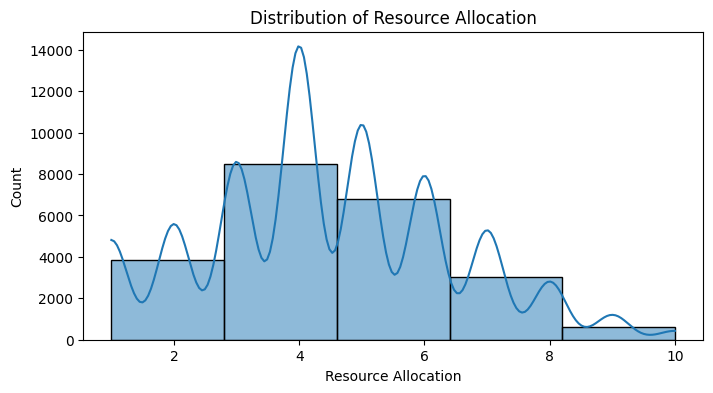

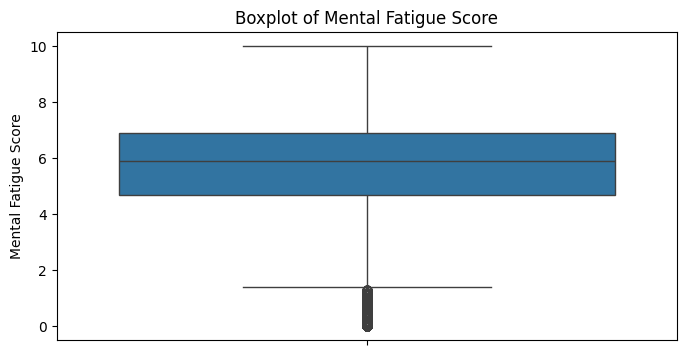

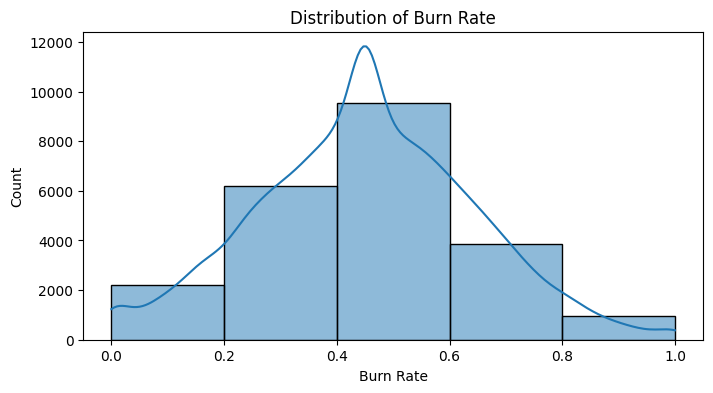

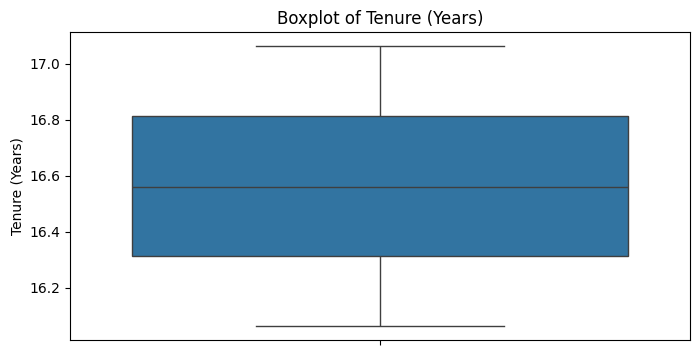

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Analysis
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Designation')
plt.title('Count of Designations')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender_encoded')
plt.title('Count of Gender Encoded')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Company_type_encoded')
plt.title('Count of Company Types Encoded')
plt.xticks(ticks=[0, 1], labels=['Type 0', 'Type 1'])
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='WFH Setup Available_encoded')
plt.title('WFH Setup Available')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Numerical Analysis
plt.figure(figsize=(8, 4))
sns.histplot(df['Resource Allocation'], bins=5, kde=True)
plt.title('Distribution of Resource Allocation')
plt.xlabel('Resource Allocation')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Mental Fatigue Score'])
plt.title('Boxplot of Mental Fatigue Score')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Burn Rate'], bins=5, kde=True)
plt.title('Distribution of Burn Rate')
plt.xlabel('Burn Rate')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Tenure (Years)'])
plt.title('Boxplot of Tenure (Years)')
plt.show()

### Bivariate Analysis

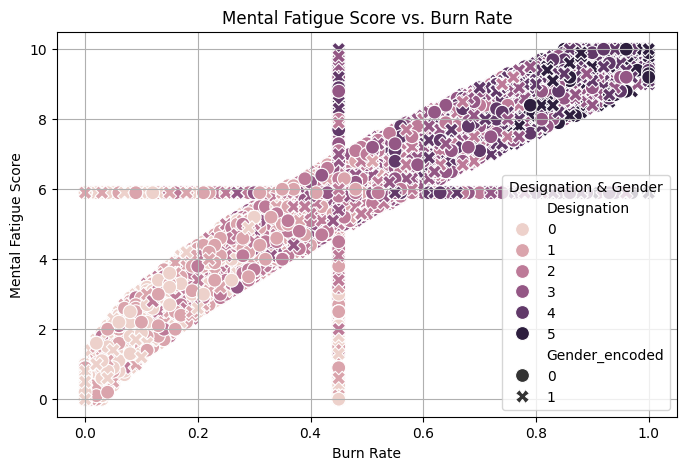

<ipython-input-15-f79b732232cd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Designation', y='Mental Fatigue Score', inner='quartile', palette='pastel')


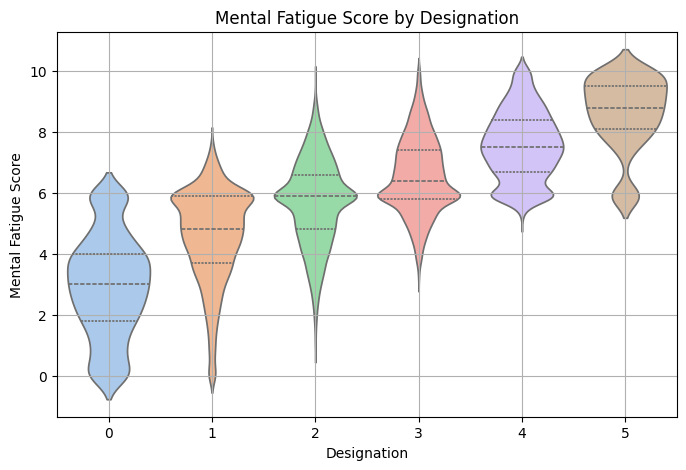

<ipython-input-15-f79b732232cd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender_encoded', y='Burn Rate', palette='Set1')


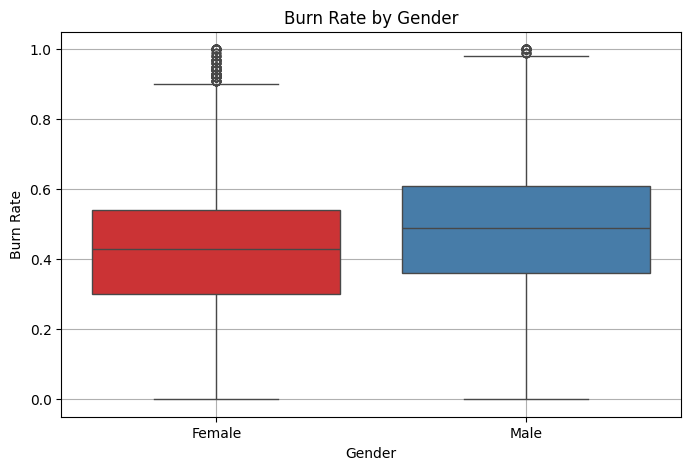

<ipython-input-15-f79b732232cd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WFH Setup Available_encoded', y='Mental Fatigue Score', palette='Set3')


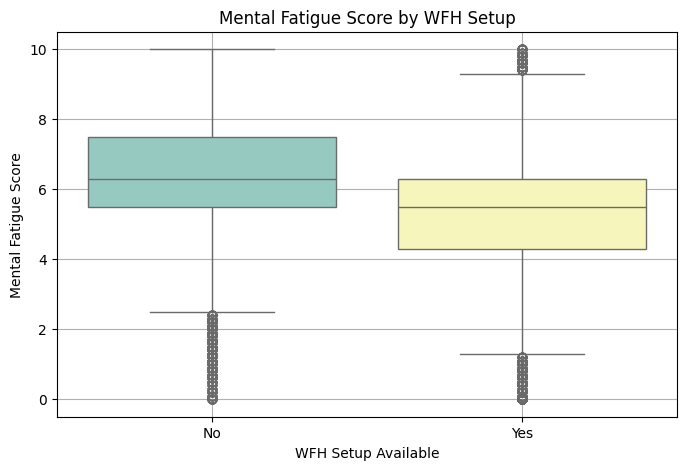

In [ ]:
# 1. Mental Fatigue Score vs. Burn Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Burn Rate', y='Mental Fatigue Score', hue='Designation', style='Gender_encoded', s=100)
plt.title('Mental Fatigue Score vs. Burn Rate')
plt.xlabel('Burn Rate')
plt.ylabel('Mental Fatigue Score')
plt.legend(title='Designation & Gender')
plt.grid()
plt.show()


# 2. Designation vs. Mental Fatigue Score
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Designation', y='Mental Fatigue Score', inner='quartile', palette='pastel')
plt.title('Mental Fatigue Score by Designation')
plt.xlabel('Designation')
plt.ylabel('Mental Fatigue Score')
plt.grid()
plt.show()

# 3. Gender vs. Burn Rate
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender_encoded', y='Burn Rate', palette='Set1')
plt.title('Burn Rate by Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Burn Rate')
plt.grid()
plt.show()

# 4. WFH Setup vs. Mental Fatigue Score
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='WFH Setup Available_encoded', y='Mental Fatigue Score', palette='Set3')
plt.title('Mental Fatigue Score by WFH Setup')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('WFH Setup Available')
plt.ylabel('Mental Fatigue Score')
plt.grid()
plt.show()

## Modelling

To predict the Burn Rate, we will build a supervised regression model since Burn Rate is a continuous variable. The process will involve several key steps:

1. Data Preparation -  splitting the data into training and testing sets.

2. Model Selection - We will fit four different regression models:

    - Linear Regression: Assumes a linear relationship between features and the target.

    - Decision Tree Regressor: Captures non-linear relationships through decision splits.

    - Random Forest Regressor: An ensemble method that improves accuracy by averaging multiple decision trees.

    - Gradient Boosting Regressor: Builds trees sequentially to correct the errors of previous models.

3. Model Training and Evaluation - Each model is trained on the training set, and their performance is evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) on the test set.

4. Hyperparameter Tuning - After identifying the best-performing model based on evaluation metrics, we will optimize its performance through hyperparameter tuning using Grid Search or Random Search.

### Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Step 2: Define Features and Target Variable

We separate the features (independent variables) from the target variable (dependent variable).
X contains all columns except 'Burn Rate', while y contains only the 'Burn Rate' column, which we want to predict.

In [ ]:
# Features and target variable
X = df.drop('Burn Rate', axis=1)  # Features
y = df['Burn Rate']                # Target variable

### Step 3: Split the Data into Training and Testing Sets

We split the dataset into training and testing sets using train_test_split.

test_size=0.2 indicates that 20% of the data will be used for testing, while 80% will be used for training.

random_state=42 ensures that the split is reproducible.

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Define the Models

We create a dictionary to hold different regression models.

Each model is instantiated from its respective class, which will be used for training and predictions.

In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


Step 5: Train and Evaluate Each Model

We initialize an empty dictionary results to store the evaluation metrics for each model.

We loop through each model in our models dictionary:
  - model.fit(X_train, y_train) trains the model on the training data.
  - y_pred = model.predict(X_test) generates predictions on the test set.
  - We calculate three evaluation metrics:
      - Mean Absolute Error (MAE): Average absolute difference between predicted and actual values.
      - Mean Squared Error (MSE): Average of the squares of the errors.
      - R-squared (R²): Proportion of variance in the dependent variable that can be explained by the independent variables.
  - The results are stored in the results dictionary.

In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)              # Train the model
    y_pred = model.predict(X_test)           # Make predictions

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}


### Step 6: Display the Results

We convert the results dictionary into a DataFrame for better readability.

The .T transposes the DataFrame so that models are rows and metrics are columns.

We print the model performance metrics.

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)


Model Performance:
                        MAE       MSE        R2
Linear Regression  0.056895  0.006107  0.830323
Decision Tree      0.073157  0.010180  0.717173
Random Forest      0.056482  0.005898  0.836137
Gradient Boosting  0.053420  0.005224  0.854869


### Step 7: Identifying the Best Model

In [ ]:
# Identify the best model
best_model_name = results_df['R2'].idxmax()
print(f"\nBest Model: {best_model_name}")



Best Model: Gradient Boosting


### Hyperparameter Tuning

Since we've idntified that Gradient boosting is the best performing model with with a predictability power of about 85.48%, we'll proceed to do more tunning of the hypaparameters to ensure we get a a more stable model.

#### 1. Defining the parameter grid

We create a parameter grid that outlines the hyperparameters to tune. This grid will serve as a roadmap, guiding my search for the most effective model settings.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Total number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Controls how much to shrink the contribution of each tree
    'max_depth': [3, 5, 7],  # Limits the depth of the individual trees, controlling overfitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


#### 2. Initializing the Model and GridSearchCV

Initializing the GradientBoostingRegressor and set up GridSearchCV.

This will help to evaluate different combinations of hyperparameters using cross-validation, to find the best settings for the model.


In [ ]:
model = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=-1) # Using 2 Cv's due to the computational power

#### 3. Fitting the GridSearchCV

Fitting the GridSearchCV object to the training data. This step is crucial as it evaluates every specified combination of hyperparameters through cross-validation, providing a robust assessment of each configuration's performance.

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 243 candidates, totalling 486 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

#### 4. Getting the Best Parameters and Best Score

After the fitting process, we retrieve the optimal hyperparameters and the corresponding performance score. This information is invaluable as it tells us which settings yield the best results for my model.

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (MSE):", -best_score)  # Convert back to positive MSE

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (MSE): 0.0053374203710375295


#### 5. Trainning the Best Model

Using the best hyperparameters to train a new instance of the model on the training dataset. This final model is what will be used for making predictions and further evaluations.

In [ ]:
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=10,
                          n_estimators=200)

#### 6. Making Predictions

Now we can make predictions on the test data. This step allows to evaluate how well the model performs on unseen data.

In [ ]:
# Assuming X_test is my test dataset
predictions = best_model.predict(X_test)

# Optionally, I can print some of the predictions
print("Predictions:", predictions)


Predictions: [0.28900876 0.51533282 0.37052134 ... 0.5940406  0.63694684 0.4717748 ]


#### 7. Evaluating the Optimal Model

Evaluating the the model's performance using  Mean Squared Error (MSE) and R² score metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.005112834008666761
R² Score: 0.8579558671696985


#### 8. Feature Importance

Mental Fatigue Score, Resource Allocation and Designation are the key features in the model.

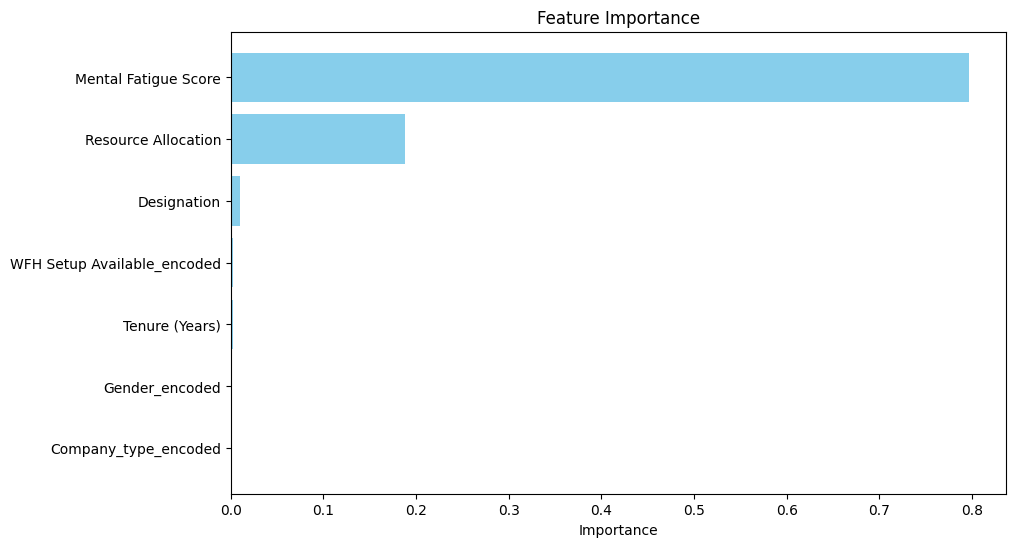

In [ ]:
import matplotlib.pyplot as plt

# Using the optimal model
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
features = features.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


### Fitting the Model withe the Most important Features

#### 1. Defining the paramenters

In [ ]:
df = df.drop(['Company_type_encoded', 'Gender_encoded', 'WFH Setup Available_encoded', 'Tenure (Years)'], axis=1)

In [ ]:
X = df.drop('Burn Rate', axis=1)  # Features
y = df['Burn Rate']

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Total number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Controls how much to shrink the contribution of each tree
    'max_depth': [3, 5, 7],  # Limits the depth of the individual trees, controlling overfitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


#### 2. Initializing the Model and GridSearchCV

In [ ]:
model = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=-1) # Using 2 Cv's due to the computational power

#### 3. Fitting the GridSearchCV

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 243 candidates, totalling 486 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

#### 4. Getting the Best Parameters and Best Score

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (MSE):", -best_score)  # Convert back to positive MSE

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (MSE): 0.005336214627025241


#### 5. Trainning the Best Model

In [ ]:
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=10,
                          n_estimators=200)

#### 6. Making Predictions

In [ ]:
# Assuming X_test is my test dataset
predictions = best_model.predict(X_test)

# Optionally, I can print some of the predictions
print("Predictions:", predictions)

Predictions: [0.28900876 0.51533282 0.37052134 ... 0.5940406  0.63694684 0.4717748 ]


#### 7. Evaluating the Optimal Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.00511283400866676
R² Score: 0.8579558671696986


### Conclusion

- The results from the model evaluation show some improvements after fine-tunning the hyperparameters.

- Initially, the baseline model had a Mean Squared Error (MSE) of 0.005226 and an R² score of 0.8548. This meant that while it was performing reasonably well, there was still room for improvement. After adjusting the hyperparameters, the MSE dropped to 0.0051133, which indicates that the predictions are now even closer to the actual values. This is a positive sign that the model is fitting the data better.

- Moreover, the R² score increased to 0.8579, suggesting that the tuned model explains a larger portion of the variability in the target variable. It means we're capturing more of the underlying patterns in the data.

- In summary, these improvements show that by tweaking the model's settings, we were able to enhance its performance. This means our model is now more reliable and accurate, which is great for making informed decisions based on its predictions!

### Pickling the Model for Deployment


Using the pickle library to serialize the model object and store it in a file for deployment.

In [ ]:
import pickle

# Save the model to a file
model_filename = 'best_gradient_boosting_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to: {model_filename}")


Model saved to: best_gradient_boosting_model.pkl


In [ ]:
import joblib

joblib.dump(best_model, 'model.pkl')

['model.pkl']